In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
current_directory = "data/Excel_sheets"
files = os.listdir(current_directory)
data = pd.read_excel(current_directory + "/" +files[2])
files


['All_Collisions.xlsx',
 'CrosswalkLocations.xlsx',
 'Fatalities.xlsx',
 'PedestrianCollisions.xlsx',
 'PedestrianSignals.xlsx',
 'RegulatoryandWarningStreetSigns.xlsx',
 'TrafficSignalLocations.xlsx']

In [3]:
countY = 0
countN = 0
for i in data["ALCOHOL"]:
    if i == "Y":
        countY += 1
    else:
        countN += 1
print(countY, countN)


35 170


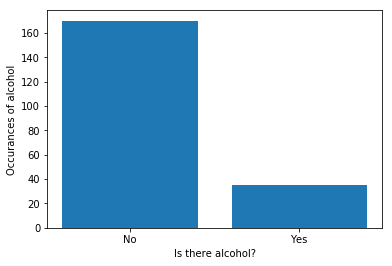

In [4]:
plt.bar([1,2],[countN,countY])
plt.xticks([1,2],["No","Yes"])
plt.ylabel("Occurances of alcohol")
plt.xlabel("Is there alcohol?")


In [17]:
data

,OBJECTID,Shape,CASE_NUM,BIPED,Address,Accident_Date,Crash_Day,Crash_Month,Crash_Year,Accident_Cause,...,WORKZONE,ALCOHOL,SEATBELTS,ACCIDENT_TIME,SEX_FAT1,RACE_FAT1,AGE_FAT1,COMMENTS,X,Y
0,1,NaN,20120424146,NaN,MUIRS CHAPEL RD/ MEADE DR,2012-04-24,TUESDAY,APRIL,2012,"OPERATED VEHICLE IN AN ERRATIC, RECKLESS, CARE...",...,NO,N,Y,12:20,F,W,31.0,NaN,-79.873083,36.083239
1,2,NaN,20120425089,P,307 S EDWARDIA ST,2012-04-26,THURSDAY,APRIL,2012,INATTENTION/ IMPROPER BACKING,...,NO,N,NaN,11:20,M,W,56.0,NaN,-79.885971,36.066957
2,3,NaN,20120430007,NaN,W FRIENDLY AVE/HILLCREST DR,2012-04-30,MONDAY,APRIL,2012,EXCEEDED AUTORIZED SPEED LIMIT/ALCOHOL USE/,...,NO,Y,Y,00:28,M,W,40.0,NaN,-79.812691,36.074823
3,4,NaN,20120510305,NaN,I 73 S. RAMP/I-40 E,2012-05-10,THURSDAY,MAY,2012,EXCEEDED SAFE SPEED FOR CONDITIONS/ PASSED ON ...,...,NO,N,Y,17:26,M,W,44.0,NaN,-79.916063,36.064793
4,5,NaN,20120524013,NaN,US 29S/ PHILLIPS AVE,2012-05-24,THURSDAY,MAY,2012,"OPERATED VEHICLE IN AN ERRATIC, RECKLESS, CARE...",...,NO,Y,Y,00:23,M,H,21.0,NaN,-79.764735,36.100016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,NaN,20190714204,P,E CONE BLVD,2019-07-14,SUNDAY,JULY,2019,UNKNOWN,...,NO,N,NaN,10:34:00 PM,M,W,60.0,NaN,-79.753520,36.112765
201,202,NaN,20190718080,NaN,MCCONNELL RD,2019-07-18,SUNDAY,JULY,2019,DISREGARDED TRAFFIC SIGNALS/ INATTENTION,...,NO,N,Y,6:42:00 AM,M,W,43.0,NaN,-79.757390,36.063220
202,203,NaN,20190726143,NaN,DRAWBRIDGE PKWY,2019-07-26,FRIDAY,JULY,2019,EXCEEDED AUTHORIZED SPEED LIMIT/ CROSSED CENTE...,...,NO,N,N,2:22:00 PM,M,W,81.0,NaN,-79.874968,36.132137
203,204,NaN,20190801270,NaN,US 29,2019-08-01,THURSDAY,AUGUST,2019,CROSSED CENTERLINE/GOING WRONG WAY/ OPERATED V...,...,NO,N,Y,10:18:00 PM,F,B,56.0,FAT_1 DIED ON 8/5/2019,-79.748803,36.124220


In [6]:
def extractDate(data):
    dates = []
    datetimes = data.Accident_Date.unique()
    for date in datetimes:
        year = str(date)[0:4]
        month = str(date)[5:7]
        day = str(date)[8:10]
        dates.append({"month":month, "day": day, "year":year})
    return dates

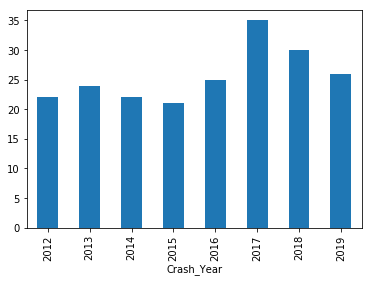

In [97]:
crash_counts_by_year = (data.groupby("Crash_Year").count())["OBJECTID"]
crash_counts_by_year.plot.bar()

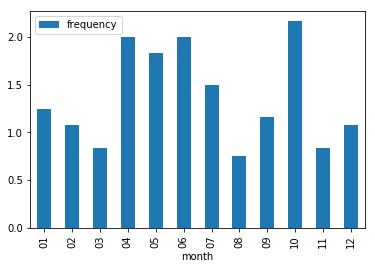

In [98]:




dates = extractDate(data)
dates = pd.DataFrame(dates)

def getCountsByMonth(dates):
    dictionary = {}
    years = dates.year.unique()
    for year in years:
        year_table = dates[dates["year"] == year]
        monthcounts = pd.DataFrame(year_table.groupby("month").count()["day"])
        monthcounts = monthcounts.rename(columns = {"day":"frequency"})
        dictionary[year] = monthcounts
    return dictionary

dictionary = getCountsByMonth(dates)
total_counts = dictionary["2012"]
years = list(dictionary.keys())[1:]
for year in years:
    total_counts = total_counts.add(dictionary[year], fill_value = 0)

    
for i in range(len(total_counts)):
    total_counts["frequency"][i] = total_counts["frequency"][i]/len(total_counts)
#here is the average number of fatalities
total_counts.plot.bar()

In [9]:
import requests
import json
from math import *
path = "data/weather_data"
files = os.listdir(path)
file = open(path + "/" + files[2], "r")
weather_data = json.load(file)
file.close()
weather_data = pd.DataFrame(weather_data)
date = (dates["year"][0] + "-" + dates["month"][0])


In [10]:
weather_year_dict = {}
years = dates.year.unique()
for year in years:
    weather_year_dict[year] = weather_data[weather_data["dt_iso"].str.contains(year)]


In [11]:
def getMonthTables(year, table):
    month_dict = {}
    for i in range(1,12 + 1):
        i = str(i)
        if len(i) == 1:
            i = "0" + i
        month_dict[i] = table[table["dt_iso"].str.contains(year + "-" + i)]
    return month_dict
        
    
        

In [12]:
weather_year_dict["2019"]
weather_month_dict = {}
for year in years:
    weather_month_dict[year] = getMonthTables(year, weather_year_dict[year])

In [13]:
def extract_days(dates):
    days = set()
    for date in dates:
        days.add(date[8:10])
    return days

def getDayTable(month_table, month, day, year):
    return month_table[month_table["dt_iso"].str.contains(year + "-" + day + "-" + month)]
    

def getDayTables(table):
    day_dict = {}
    for year in table:
        month_dict = table[year]
        day_dict[year] ={}
        for month in month_dict:
            days = extract_days(month_dict[month].dt_iso.unique())
            day_dict[year][month] ={}
            for day in days:
                day_dict[year][month][day] = getDayTable(month_dict[month], month, day, year)
    return day_dict


In [14]:
day_tables = getDayTables(weather_month_dict)

In [19]:
day_tables["2012"]["10"]["10"]

,city_id,main,wind,clouds,weather,dt,dt_iso,rain,snow
203,4169510,"{'temp': 295.8, 'temp_min': 294.82, 'temp_max'...","{'speed': 1, 'deg': 40}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1349827200,2012-10-10 00:00:00 +0000 UTC,NaN,NaN
204,4169510,"{'temp': 294.63, 'temp_min': 293.71, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1349830800,2012-10-10 01:00:00 +0000 UTC,NaN,NaN
205,4169510,"{'temp': 294.37, 'temp_min': 293.71, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1349834400,2012-10-10 02:00:00 +0000 UTC,NaN,NaN
206,4169510,"{'temp': 293.95, 'temp_min': 292.59, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 1},"[{'id': 800, 'main': 'Clear', 'description': '...",1349838000,2012-10-10 03:00:00 +0000 UTC,NaN,NaN
207,4169510,"{'temp': 293.79, 'temp_min': 292.59, 'temp_max...","{'speed': 0, 'deg': 0}",{'all': 75},"[{'id': 803, 'main': 'Clouds', 'description': ...",1349841600,2012-10-10 04:00:00 +0000 UTC,NaN,NaN
...,...,...,...,...,...,...,...,...,...
247946,4815207,"{'temp': 287.21, 'temp_min': 287.15, 'temp_max...","{'speed': 0, 'deg': 271}",{'all': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1349895600,2012-10-10 19:00:00 +0000 UTC,"{'1h': 0, 'today': 0}",NaN
247947,4815207,"{'temp': 287.14, 'temp_min': 287.04, 'temp_max...","{'speed': 0, 'deg': 235}",{'all': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1349899200,2012-10-10 20:00:00 +0000 UTC,"{'1h': 0, 'today': 0}",NaN
247948,4815207,"{'temp': 287.59, 'temp_min': 287.59, 'temp_max...","{'speed': 0, 'deg': 130}",{'all': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1349902800,2012-10-10 21:00:00 +0000 UTC,"{'1h': 0, 'today': 0}",NaN
247949,4815207,"{'temp': 287.845, 'temp_min': 287.845, 'temp_m...","{'speed': 0, 'deg': 191}",{'all': 0},"[{'id': 800, 'main': 'Clear', 'description': '...",1349906400,2012-10-10 22:00:00 +0000 UTC,"{'1h': 0, 'today': 0}",NaN


In [140]:
accident_times = data[["Accident_Date","ACCIDENT_TIME"]]
for i in range(len(accident_times)):
    if accident_times["ACCIDENT_TIME"][i] == "1008":
        accident_times["ACCIDENT_TIME"][i] = "10:08"
    if len(accident_times["ACCIDENT_TIME"][i]) >= 11:
        accident_times["ACCIDENT_TIME"][i] = accident_times["ACCIDENT_TIME"][i][0:5]
    elif len(accident_times["ACCIDENT_TIME"][i]) == 10:
        accident_times["ACCIDENT_TIME"][i] = accident_times["ACCIDENT_TIME"][i][0:4]

for i in range(len(accident_times)):
    if len(accident_times["ACCIDENT_TIME"][i]) == 4:
        accident_times["ACCIDENT_TIME"][i] = "0" + accident_times["ACCIDENT_TIME"][i]

accident_times.ACCIDENT_TIME.unique()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

array(['12:20', '11:20', '00:28', '17:26', '00:23', '20:35', '23:10',
       '16:39', '05:20', '16:15', '05:42', '15:23', '10:29', '04:15',
       '22:40', '01:40', '17:15', '20:45', '17:27', '15:25', '19:17',
       '19:42', '19:48', '14:11', '16:48', '00:04', '04:13', '02:05',
       '17:51', '04:30', '12:00', '22:35', '10:11', '05:00', '17:20',
       '02:55', '23:53', '19:33', '08:33', '10:04', '20:33', '08:42',
       '22:00', '04:48', '04:12', '10:34', '19:10', '23:40', '15:46',
       '10:44', '21:47', '02:20', '19:45', '17:47', '11:21', '08:29',
       '06:17', '04:20', '17:55', '21:15', '05:34', '08:18', '21:05',
       '17:25', '15:08', '01:03', '23:25', '13:55', '14:25', '19:25',
       '16:11', '01:50', '03:00', '08:04', '20:01', '05:36', '07:00',
       '23:38', '18:43', '23:45', '15:21', '21:53', '09:38', '07:37',
       '10:20', '20:10', '07:54', '18:45', '01:30', '04:21', '02:59',
       '00:01', '10:10', '16:55', '23:36', '11:45', '12:09', '23:12',
       '12:46', '18:

In [141]:
for i in range(len(accident_times)):
    time = accident_times["ACCIDENT_TIME"][i]
    time = time.split(":") 
    time = (int(time[0]) + round(int(time[1])/60)) % 24
    accident_times["ACCIDENT_TIME"][i] = time
    



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


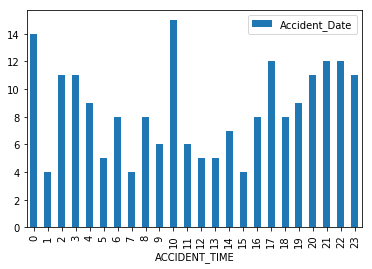

In [145]:
fatalitie_stats = accident_times.groupby("ACCIDENT_TIME").count()
fatalitie_stats.plot.bar()